# Visualization and analysis of Fashion MNIST dataset

**Fashion-MNIST** is a dataset of Zalando's article images—consisting of a training set of **60,000** examples and a test set of **10,000** examples. Each example is a **28x28 grayscale image**, associated with a label from **10 classes**.

### Necessary imports

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Acquisition

The Fashion MNIST dataset is retrieved from the `torchvision.datasets` module. 

A transformation pipeline is applied to convert pixel data into PyTorch tensors. 

This conversion scales intensities from the original range [0, 255] to a normalized range of [0, 1]. 

Class names from the dataset are defined for labeling.

In [2]:
# Transformation pipeline
transform = transforms.ToTensor()

# Training and test datasets
train_data = datasets.FashionMNIST(
    root='data', 
    train=True, 
    download=True, 
    transform=transform
)

test_data = datasets.FashionMNIST(
    root='data', 
    train=False, 
    download=True, 
    transform=transform
)

# Class names
labels_map = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

print(f"Dataset Acquisition Complete.")
print(f"Training set size: {len(train_data)}")
print(f"Testing set size:  {len(test_data)}")

Dataset Acquisition Complete.
Training set size: 60000
Testing set size:  10000


## Single Image Analysis

The structure of an individual data point is examined.

The image dimensions are verified to be 28x28 pixels.

The pixel intensity values are checked to ensure they are correctly scaled between 0 and 1.

The sample is rendered to confirm the visual content matches the assigned label.

Image Shape:    torch.Size([1, 28, 28]) (Channels, Height, Width)
Pixel Range:    0.00 to 1.00
Assigned Class: Ankle boot


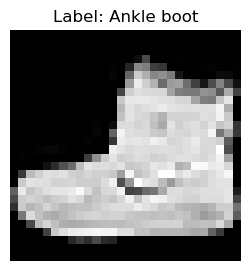

In [3]:
# Selection of a single sample
image, label = train_data[0]

# Technical metadata display
print(f"Image Shape:    {image.shape} (Channels, Height, Width)")
print(f"Pixel Range:    {image.min().item():.2f} to {image.max().item():.2f}")
print(f"Assigned Class: {labels_map[label]}")

# Visual verification
plt.figure(figsize=(3, 3))
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {labels_map[label]}")
plt.axis("off")
plt.show()

## Dataset Sample Review

A collection of images from the training set is rendered to observe variety.

Multiple categories are displayed to check for visual differences between classes.

This grid confirms that the data loading and labeling process is consistent across different items.

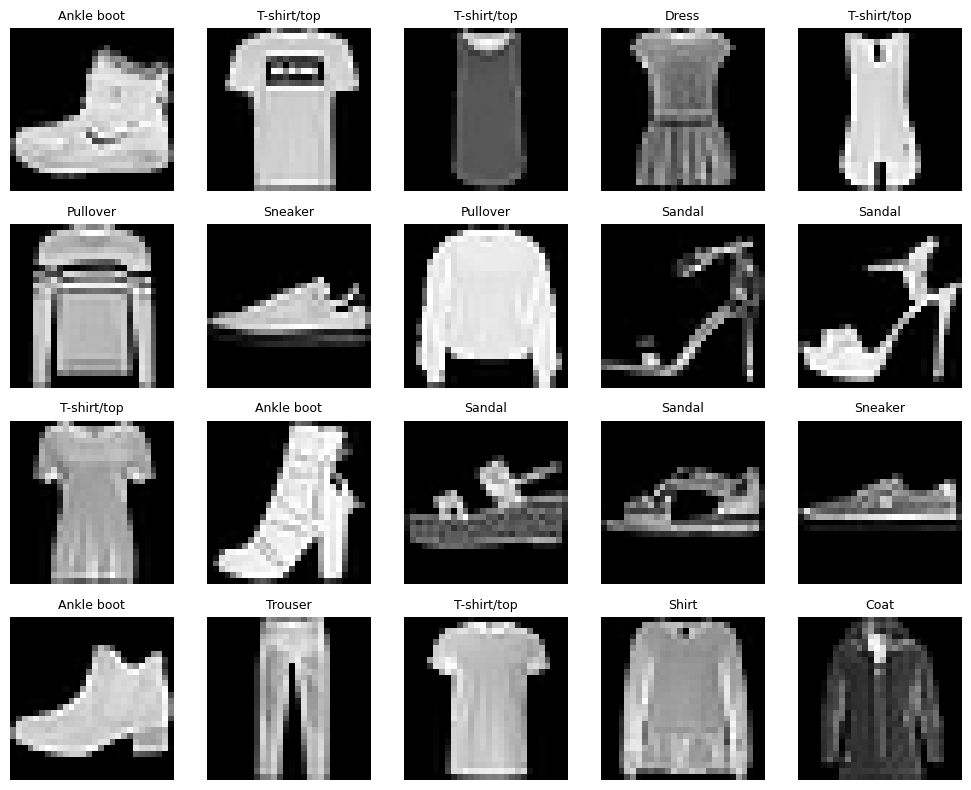

In [4]:
# Grid configuration
rows, cols = 4, 5
plt.figure(figsize=(10, 8))

# Sampling for visualization
for i in range(rows * cols):
    image, label = train_data[i]
    plt.subplot(rows, cols, i + 1)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(labels_map[label], fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()

## Class Distribution Analysis

### Training set

The frequency of each category within the training set is calculated.

Checking for class balance is necessary to ensure the dataset is representative.

A bar chart shows the distribution of images across the ten categories.

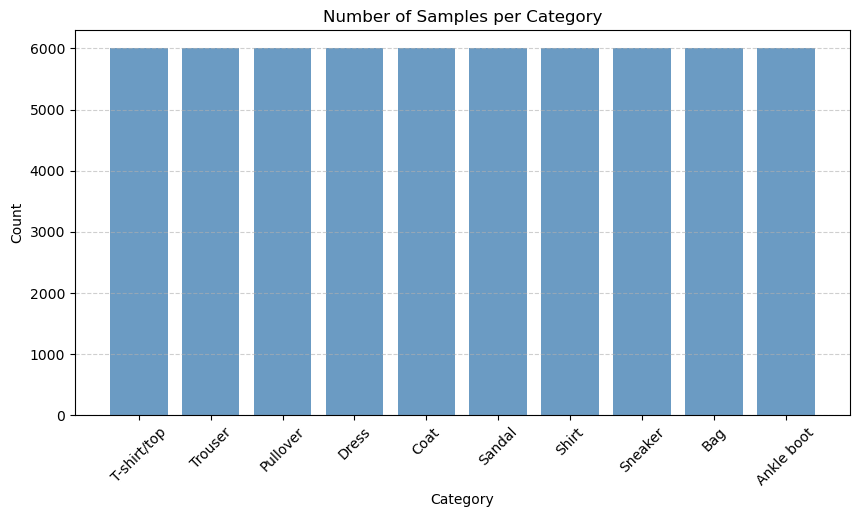

In [5]:
# Extraction of labels
labels = train_data.targets.numpy()

# Calculation of counts for each class
unique, counts = np.unique(labels, return_counts=True)
class_names = [labels_map[i] for i in unique]

# Visualization of class balance
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts, color='steelblue', alpha=0.8)
plt.title("Number of Samples per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Conclusion:

The frequency analysis confirms that the training dataset is perfectly balanced.

Each of the ten fashion categories contains exactly 6,000 samples.

This balance prevents the model from developing a bias toward any specific class during the training process.

### Test Set

An identical frequency analysis is performed on the test dataset.

This comparison ensures that the evaluation data maintains the same statistical properties as the training data.

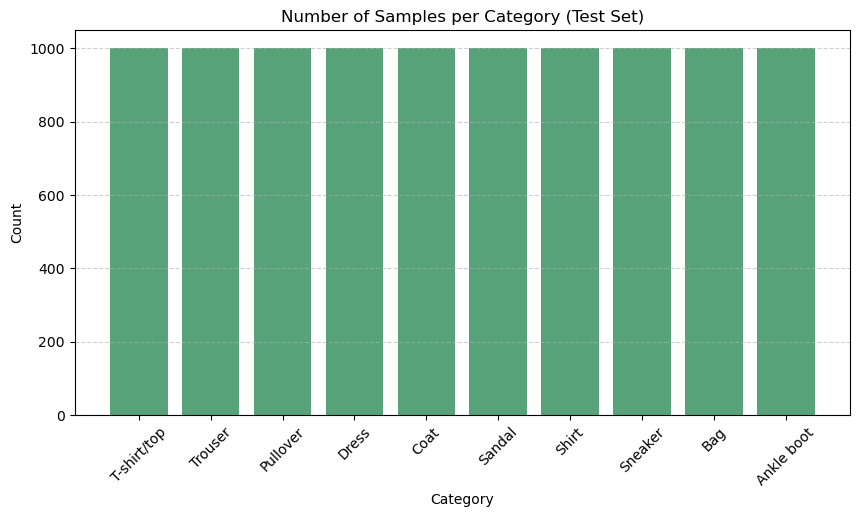

In [6]:
# Extraction of labels from the test set
test_labels = test_data.targets.numpy()

# Calculation of counts for each class
test_unique, test_counts = np.unique(test_labels, return_counts=True)
test_class_names = [labels_map[i] for i in test_unique]

# Visualization of class balance
plt.figure(figsize=(10, 5))
plt.bar(test_class_names, test_counts, color='seagreen', alpha=0.8)
plt.title("Number of Samples per Category (Test Set)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Conclusion:

The test set contains exactly 1,000 samples per category, totaling 10,000 images.

The ratio of classes in the test set perfectly mirrors the ratio found in the training set.

Both datasets are confirmed to be balanced.

## Class Prototype Analysis

### Training set

The underlying structure of the dataset is investigated by calculating the Mean Image for each category. 

By averaging all 6,000 images within a specific class, individual variations—such as specific patterns or unique cuts—are filtered out. 

This process reveals the "prototype" shape that defines each fashion category.

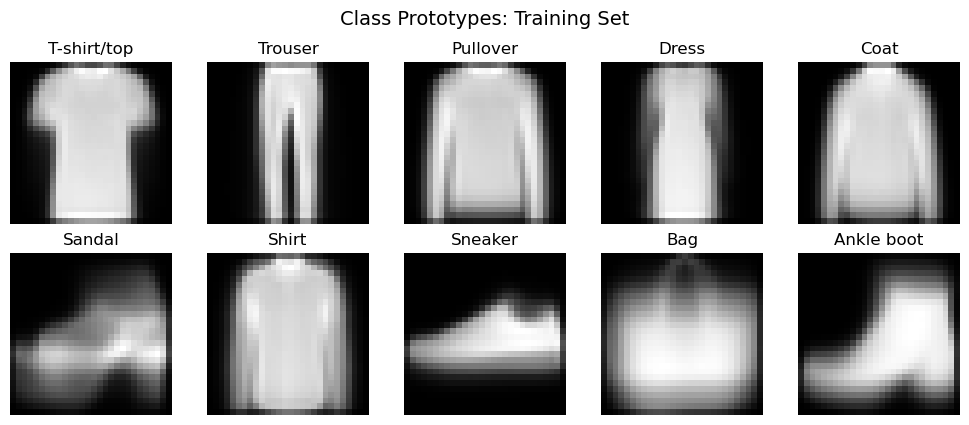

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

train_means = []

for i in range(10):
    # Calculate mean image
    mask = train_data.targets == i
    class_pixels = train_data.data[mask].float()
    mean_image = torch.mean(class_pixels, dim=0)
    train_means.append(mean_image)
    
    # Display the mean image
    axes[i].imshow(mean_image, cmap='gray')
    axes[i].set_title(labels_map[i])
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Class Prototypes: Training Set", fontsize=14, y=1.05)
plt.show()

### Test set
An identical averaging procedure is performed on the test dataset to verify that the visual archetypes remain consistent with those found in the training data.

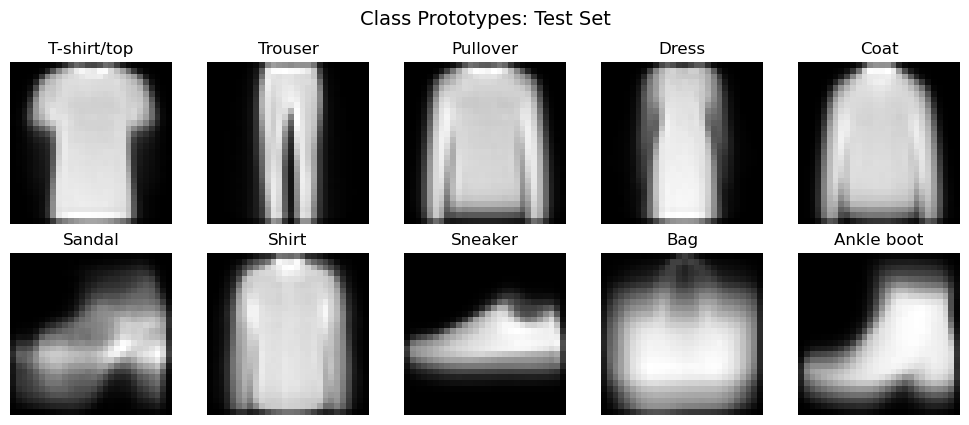

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

test_means = []

for i in range(10):
    # Calculate mean image
    mask = test_data.targets == i
    test_class_pixels = test_data.data[mask].float()
    mean_image_test = torch.mean(test_class_pixels, dim=0)
    test_means.append(mean_image_test)
    
    # Display mean image
    axes[i].imshow(mean_image_test, cmap='gray')
    axes[i].set_title(labels_map[i])
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Class Prototypes: Test Set", fontsize=14, y=1.05)
plt.show()

### Prototype Difference

The structural consistency between the sets is measured by calculating the absolute difference between the training and test prototypes. 

By subtracting the pixel values of the test means from the training means, most common shifts in garment positioning, size, or intensity are highlighted.

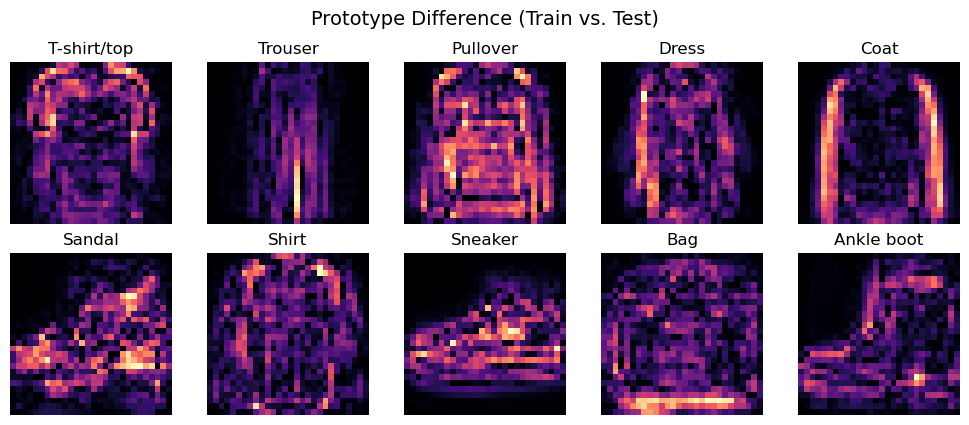

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

for i in range(10):
    # Absolute difference in pixel values
    diff_image = torch.abs(train_means[i] - test_means[i])
    
    # Display of prototype difference
    axes[i].imshow(diff_image, cmap='magma')
    axes[i].set_title(labels_map[i])
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Prototype Difference (Train vs. Test)", fontsize=14, y=1.05)
plt.show()

#### Conclusion:

The prototypes generated from the test set are very similar to those of the training set, while also not being identical. 

Similarity confirms that the 10,000 test images are a representative sample of the broader dataset, while the slight difference allows for test dataset to be appropriate for model evaluation. 

Key features, such as the high-top profile of the Ankle boot and the narrow silhouette of the Trouser, are preserved across both subsets, ensuring that a model trained on one will encounter the same fundamental patterns in the other.

## Class Variance Analysis

The Class Variance identifies the specific parts of an image that change the most within a category. 

While the mean image shows the average shape, the standard deviation shows the part with most changing between the different images of perticular class.

The bright areas represent high variability (features like sleeve length or heel height that differ between items). 

Dark areas represent consistency (pixels that are almost always the same, such as the background).

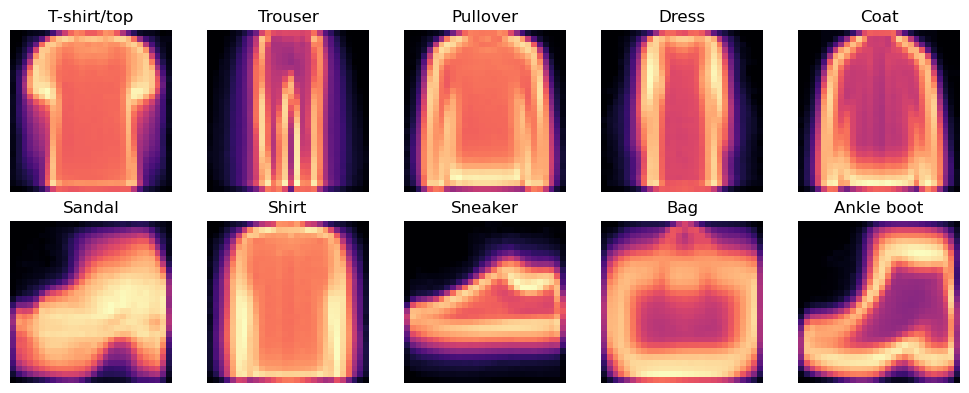

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

for i in range(10):
    # Filter images by class
    mask = train_data.targets == i
    class_pixels = train_data.data[mask].float() / 255.0
    
    # Calculate standard deviation per pixel
    std_image = torch.std(class_pixels, dim=0)
    
    # Render the variance map
    axes[i].imshow(std_image, cmap='magma')
    axes[i].set_title(labels_map[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Test set
An identical analysis is performed on the test set to ensure that the visual diversity remains consistent across both data subsets.

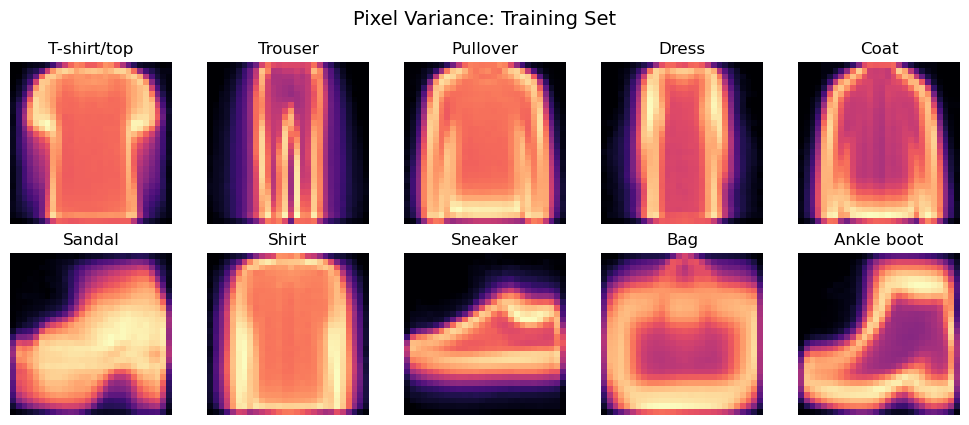

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.flatten()

for i in range(10):
    # Filter images by class
    mask = train_data.targets == i
    class_pixels = train_data.data[mask].float() / 255.0
    
    # Calculate standard deviation per pixel
    std_image = torch.std(class_pixels, dim=0)
    
    # Render the variance map
    axes[i].imshow(std_image, cmap='magma')
    axes[i].set_title(labels_map[i])
    axes[i].axis('off')

plt.tight_layout()
plt.suptitle("Pixel Variance: Training Set", fontsize=14, y=1.05)
plt.show()

#### Numerical comparison
This column graph quantifies the average magnitude of change within each class. 

It allows for a direct comparison between the training and test sets to ensure the diversity is consistent across both.

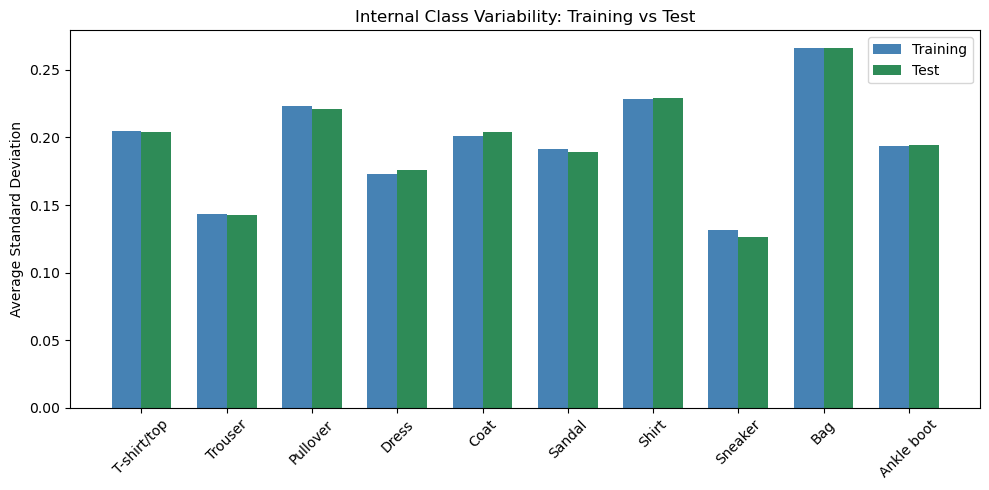

In [12]:
# Calculate average standard deviation
train_stds = [torch.std(train_data.data[train_data.targets == i].float() / 255.0, dim=0).mean().item() for i in range(10)]
test_stds = [torch.std(test_data.data[test_data.targets == i].float() / 255.0, dim=0).mean().item() for i in range(10)]

# Plot the comparison
labels = [labels_map[i] for i in range(10)]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, train_stds, width, label='Training', color='steelblue')
plt.bar(x + width/2, test_stds, width, label='Test', color='seagreen')

plt.ylabel('Average Standard Deviation')
plt.title('Internal Class Variability: Training vs Test')
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#### Conclusion
The variance heatmaps distinguish between the stable and diverse features across the entire dataset.

Bright regions highlight features with high design diversity, such as varying sleeve lengths and necklines, which require the model to develop generalization. 

The dark regions within the silhouettes identify consistent shapes that serve as reliable anchors for accurate class identification. 

The uniform dark borders and centered variance patterns further confirm that the dataset is well-standardized.

## Quantifying Foreground vs. Background

Every image is made of foreground (the garment) and background (the empty space). 

By calculating the percentage of the grid covered by the garment it is checked if sizing and scaling of the garment stays consistent.

Separate graphs are used here to compare the spread of the training data against the test data. 

Mean Training Density: 49.79%
Mean Test Density: 50.01%


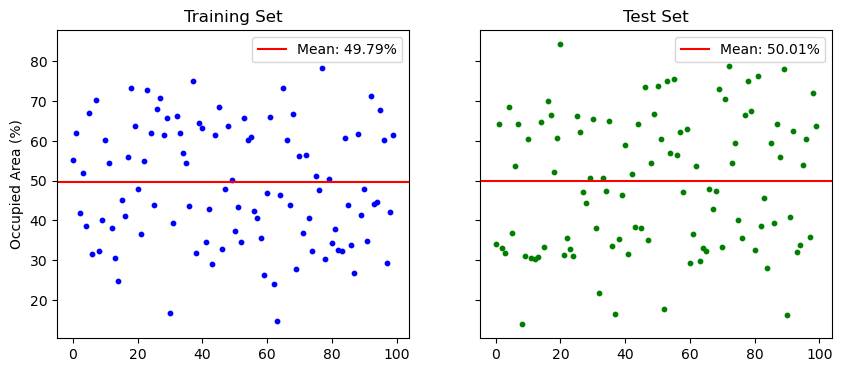

In [13]:
# Calculate the percentage of non-zero pixels for each image
train_densities = (train_data.data.view(len(train_data), -1) > 0).float().mean(dim=1).numpy() * 100
test_densities = (test_data.data.view(len(test_data), -1) > 0).float().mean(dim=1).numpy() * 100

# Calculate global means
train_mean = np.mean(train_densities)
test_mean = np.mean(test_densities)

print(f"Mean Training Density: {train_mean:.2f}%")
print(f"Mean Test Density: {test_mean:.2f}%")

# Create simple scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

# Training Set
ax1.scatter(range(100), train_densities[:100], color='blue', s=10)
ax1.axhline(train_mean, color='red', label=f'Mean: {train_mean:.2f}%')
ax1.set_title('Training Set')
ax1.set_ylabel('Occupied Area (%)')
ax1.legend()

# Test Set
ax2.scatter(range(100), test_densities[:100], color='green', s=10)
ax2.axhline(test_mean, color='red', label=f'Mean: {test_mean:.2f}%')
ax2.set_title('Test Set')
ax2.legend()

plt.show()

#### Conclusion:
The mean value and similarity between the set distributions indicate consistent density between the sets.

This alignment confirms that the images are prepared uniformly, ensuring the test set is a reliable representation of the training data.

### Class by class comparison



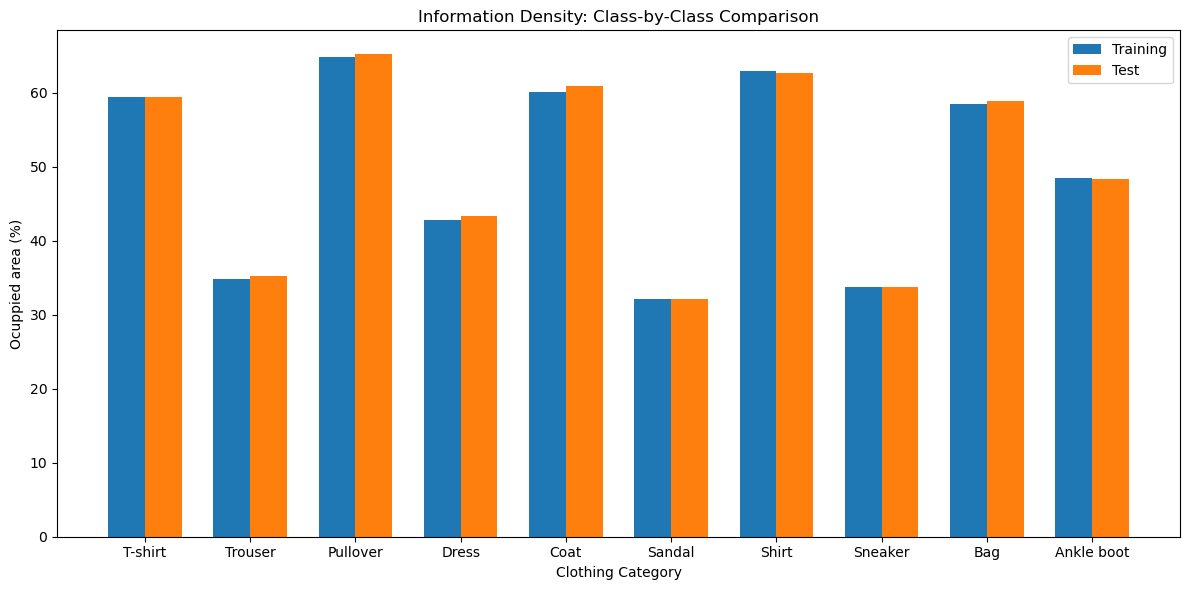

In [14]:
# Group data by class and calculate average densities
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_class_means = []
test_class_means = []

# Calculate per-class density averages
for i in range(10):
    # Training set averages per class
    train_mask = train_data.targets == i
    train_c_densities = (train_data.data[train_mask].view(-1, 784) > 0).float().mean(dim=1).numpy() * 100
    train_class_means.append(np.mean(train_c_densities))
    
    # Test set averages per class
    test_mask = test_data.targets == i
    test_c_densities = (test_data.data[test_mask].view(-1, 784) > 0).float().mean(dim=1).numpy() * 100
    test_class_means.append(np.mean(test_c_densities))

# Create the comparison graph
plt.figure(figsize=(12, 6))
x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, train_class_means, width, label='Training')
plt.bar(x + width/2, test_class_means, width, label='Test')

plt.xlabel('Clothing Category')
plt.ylabel('Ocuppied area (%)')
plt.title('Information Density: Class-by-Class Comparison')
plt.xticks(x, class_names)
plt.legend()

plt.tight_layout()
plt.show()

#### Conclusion:

Class distinction also shows the similarity between sets, confirming that training and test data are perfectly synchronized across all categories. 

The graph also showcases the difference between areas different classified objects occupy, making it clear how some items are smaller than others.

## Inter-Class Similarity Analysis

The mathematical relationship between different clothing categories is measured by comparing the class prototypes. 

Each average image is flattened into a single list of numbers, and the Pearson Correlation Coefficient is calculated for every pair. 

This results in a 10×10 matrix that quantifies how much categories overlap in shape and pixel intensity, highlighting which items a model might easily confuse.

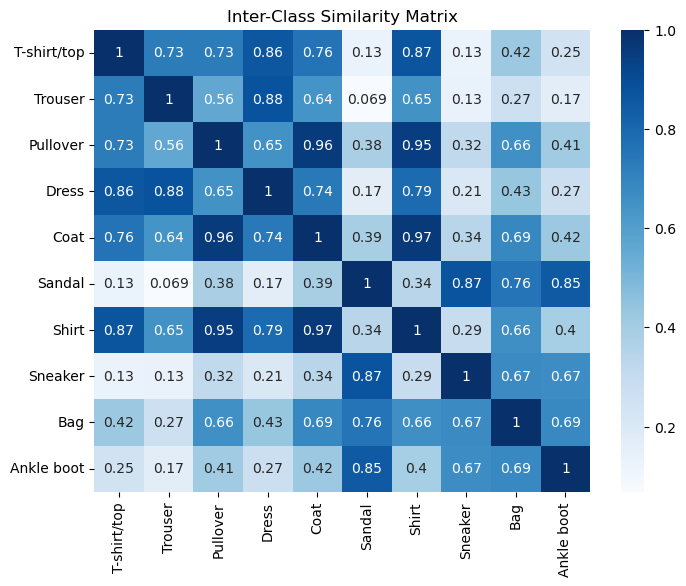

In [15]:
# Calculating mean images
class_vectors = []
for i in range(10):
    mask = train_data.targets == i
    mean_img = train_data.data[mask].float().mean(dim=0)
    class_vectors.append(mean_img.view(-1))

# Calculating correlation
matrix_data = torch.stack(class_vectors).numpy()
similarity_matrix = np.corrcoef(matrix_data)

# Heatmap generation
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, 
            annot=True, 
            cmap='Blues', 
            xticklabels=labels_map.values(), 
            yticklabels=labels_map.values())
plt.title("Inter-Class Similarity Matrix")
plt.show()

#### Conclusion

The correlation matrix identifies the specific visual relationships within the data.

The Shirt, T-shirt/top, and Pullover classes show very high correlation, confirming they share a nearly identical global structure.

Items like Sandal, Sneaker, and Ankle boot correlate well with each other but stay distinct from all other clothing types.

Trouser and Bag exhibit the lowest similarity to other categories, indicating their unique silhouettes make them stand out in the dataset.

## Final conclusion

The analysis shows that Fashion MNIST is a high-quality dataset because it is perfectly balanced and consistently standardized. 

The tests confirm that the training and test sets are nearly identical in their patterns and density, making the test set a reliable way to check a model's performance. 

Overall, this statistical consistency makes it a stable and trustworthy tool for measuring how well a model learns.